In [7]:
import os,sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

In [2]:
lst = {'Name':['sam','ram','bam','luke','duke','kane','bim','jim','ruka','luka','dj','shiv','kirt','loyd','pika'],
        'Salary': [3000,5000,4500,2545,3688,5122,25000,2365,4123,6546,20000,3579,4111,5139,60452]}
df = pd.DataFrame(lst)
df.head()

,Name,Salary
0,sam,3000
1,ram,5000
2,bam,4500
3,luke,2545
4,duke,3688


<Axes: xlabel='Salary'>

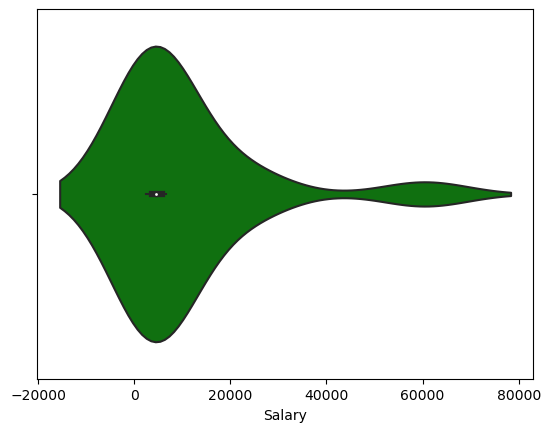

In [6]:
sns.violinplot(x = 'Salary',data=df,color = 'green')

Number of estimators: n_estimators refers to the number of base estimators or trees in the ensemble, i.e. the number of trees that will get built in the forest. This is an integer parameter and is optional. The default value is 100.

Max samples: max_samples is the number of samples to be drawn to train each base estimator. If max_samples is more than the number of samples provided, all samples will be used for all trees. The default value of max_samples is 'auto'. If 'auto', then max_samples=min(256, n_samples).

Contamination: This is a parameter that the algorithm is quite sensitive to; it refers to the expected proportion of outliers in the data set. This is used when fitting to define the threshold on the scores of the samples. The default value is 'auto'. If ‘auto’, the threshold value will be determined as in the original paper of Isolation Forest.

Max features: All the base estimators are not trained with all the features available in the dataset. It is the number of features to draw from the total features to train each base estimator or tree.The default value of max features is one.

In [21]:
# outlier_fraction = outlier/total
3/15

0.2

In [22]:
model=IsolationForest(n_estimators=100, max_samples='auto', contamination=0.2,max_features=1.0)
model.fit(df[['Salary']])

E:\Anaconda\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.2)

In [23]:
# check = model.fit(data)

We can find out the values of scores column by calling decision_function() of the trained model and passing the salary as parameter.

Similarly we can find the values of anomaly column by calling the predict() function of the trained model and passing the salary as parameter.

In [24]:
df['scores']=model.decision_function(df[['Salary']])
df['anomaly']=model.predict(df[['Salary']])
df

,Name,Salary,scores,anomaly
0,sam,3000,0.099823,1
1,ram,5000,0.144905,1
2,bam,4500,0.154478,1
3,luke,2545,0.078486,1
4,duke,3688,0.147807,1
5,kane,5122,0.145700,1
6,bim,25000,-0.089829,-1
7,jim,2365,0.037692,1
8,ruka,4123,0.159240,1
9,luka,6546,0.018999,1


In [25]:
anomaly=df.loc[df['anomaly']==-1]
anomaly_index=list(anomaly.index)
print(anomaly)

    Name  Salary    scores  anomaly
6    bim   25000 -0.089829       -1
10    dj   20000 -0.075996       -1
14  pika   60452 -0.270615       -1
